# 군집

## 공통 코드

In [1]:
import sys

# sklearn ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


## 샘플 데이터를 이용한 군집

In [2]:
#샘플 데이터 생성
from sklearn.datasets import make_blobs
#200개의 데이터를 생성하고 피처는 2개
#중심은 3개 표준편차는 0.8을 적용
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8,
                 random_state = 42)
print(X.shape, y.shape)

(200, 2) (200,)


In [4]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

[0 1 2]
[67 67 66]


In [5]:
#데이터 프레임으로 변환
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
print(clusterDF.head())

       ftr1      ftr2  target
0  6.132498  2.352236       1
1 -4.604994  9.671808       0
2 -6.889425 -7.597913       2
3 -8.038095 -8.006081       2
4 -7.351119 -6.200428       2


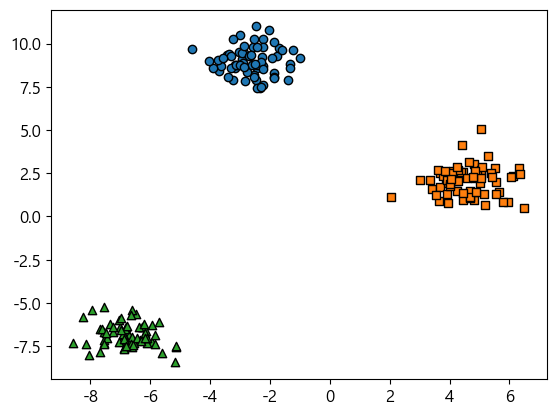

In [6]:
#데이터 분포 확인
target_list = np.unique(y)

#마커의 모양
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
               marker = markers[target])

plt.show()

In [8]:
from sklearn.mixture import GaussianMixture
#3개의 집단으로 군집
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
print(y_pred)
print(y)

[2 0 1 1 1 1 0 1 2 1 2 2 2 2 2 1 0 1 2 1 2 2 1 0 1 0 0 1 0 2 2 2 1 1 0 0 1
 0 1 0 2 0 1 2 1 2 2 1 2 0 1 0 1 0 0 0 1 2 0 2 1 0 1 1 1 1 0 0 1 0 0 1 0 2
 0 2 2 0 2 0 0 2 2 1 1 1 1 0 2 1 2 0 0 0 2 1 0 2 2 0 1 1 0 1 0 2 1 2 2 1 2
 2 0 1 0 1 1 0 0 0 1 2 0 1 1 2 0 0 2 0 2 1 0 1 1 2 2 2 0 2 0 0 1 2 2 0 2 1
 1 2 0 1 2 1 2 1 1 0 2 2 0 2 2 1 0 2 2 0 1 2 1 0 2 1 0 2 0 0 0 2 0 2 1 1 1
 0 2 2 2 0 0 2 1 1 0 1 0 0 2 2]
[1 0 2 2 2 2 0 2 1 2 1 1 1 1 1 2 0 2 1 2 1 1 2 0 2 0 0 2 0 1 1 1 2 2 0 0 2
 0 2 0 1 0 2 1 2 1 1 2 1 0 2 0 2 0 0 0 2 1 0 1 2 0 2 2 2 2 0 0 2 0 0 2 0 1
 0 1 1 0 1 0 0 1 1 2 2 2 2 0 1 2 1 0 0 0 1 2 0 1 1 0 2 2 0 2 0 1 2 1 1 2 1
 1 0 2 0 2 2 0 0 0 2 1 0 2 2 1 0 0 1 0 1 2 0 2 2 1 1 1 0 1 0 0 2 1 1 0 1 2
 2 1 0 2 1 2 1 2 2 0 1 1 0 1 1 2 0 1 1 0 2 1 2 0 1 2 0 1 0 0 0 1 0 1 2 2 2
 0 1 1 1 0 0 1 2 2 0 2 0 0 1 1]


In [9]:
#매핑된 결과 확인
from scipy import stats
mapping={}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id])
    mapping[mode[0]] = class_id
print(mapping)

{0: 0, 2: 1, 1: 2}


## 과일 이미지를 이용한 군집

In [10]:
#데이터 가져오기
fruits = np.load('./data/fruits_300.npy')
#데이터가 300개이고 이미지는 100 * 100 이고 흑백
print(fruits.shape)

(300, 100, 100)


In [11]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


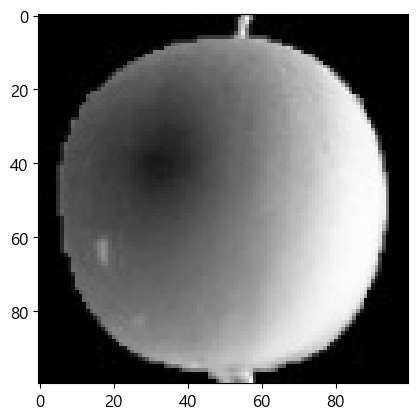

In [13]:
#이미지 출력
plt.imshow(fruits[0], cmap='gray')
plt.show()

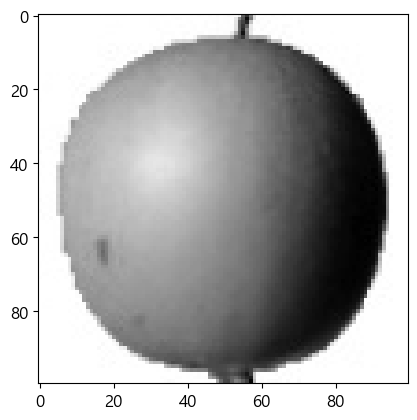

In [14]:
#이미지 출력 - 반전해서 출력
#우리가 관심을 갖는 것은 물체이므로 물체 이외의 부분은 흰색으로 보여지는 것이
#더 나은 경우가 있음
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

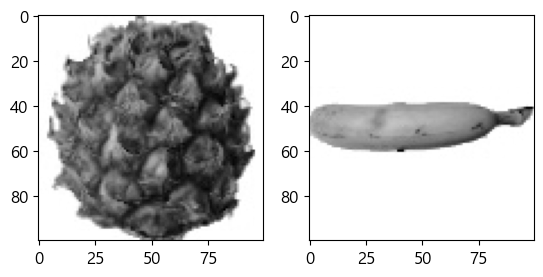

In [15]:
#파인애플 과 바나나 출력
fig, axs = plt.subplots(1, 2)

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')

plt.show()

In [19]:
#이미지 데이터를 비교하기 위해서 1차원으로 변경
#print(fruits[0])
#print(fruits[0].flatten())

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


In [22]:
#이미지 들의 평균을 출력
print(apple.mean(axis=1))
print(pineapple.mean(axis=1))
print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96

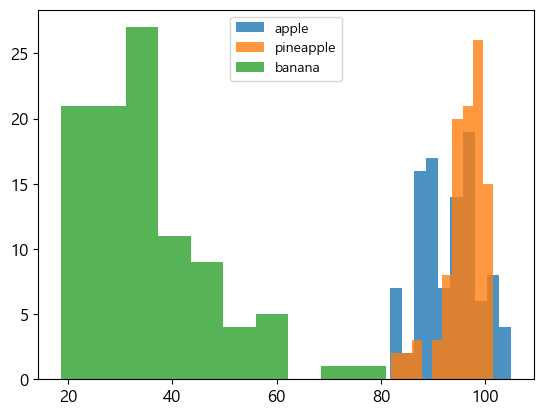

In [23]:
#평균을 시각화
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

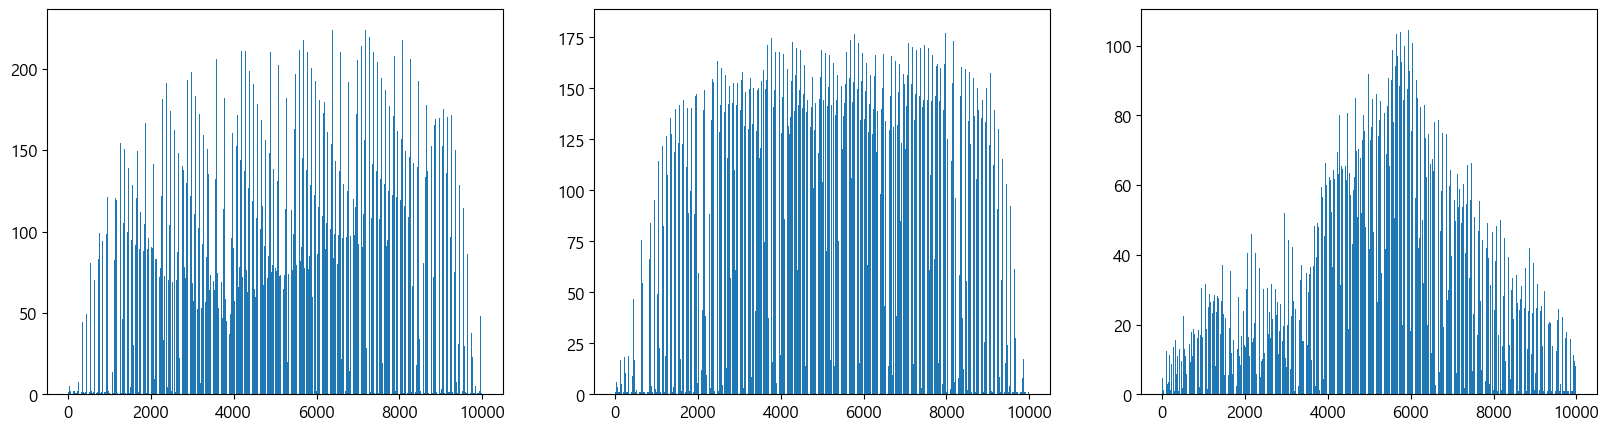

In [24]:
#픽셀 단위로 평균 분포 확인
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

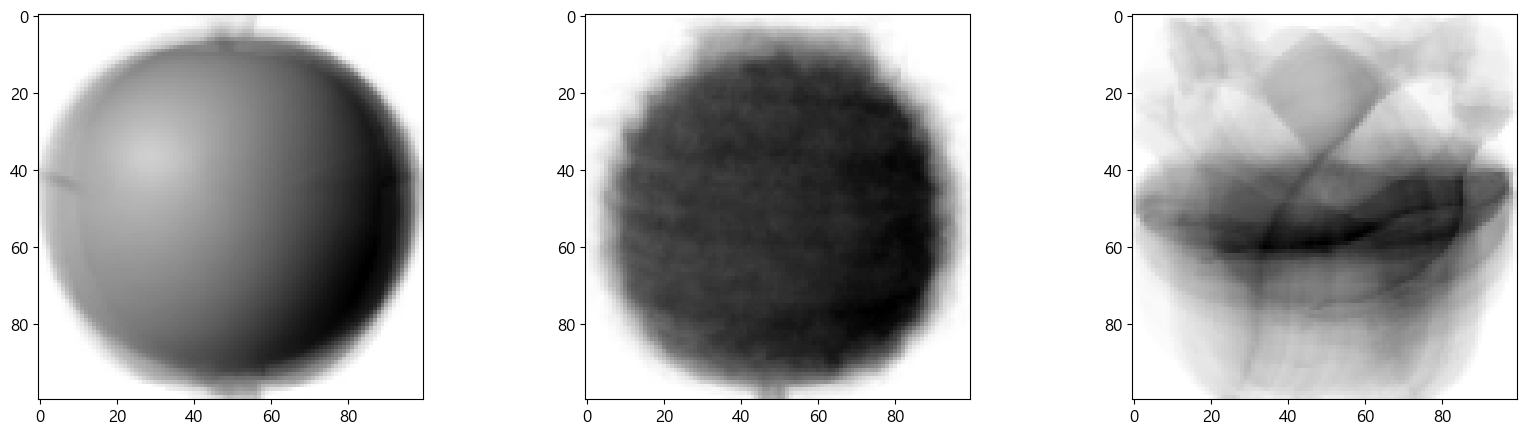

In [25]:
#평균을 가지고 이미지를 생성
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

In [26]:
#모든 데이터에서 사과의 평균을 뺀 절대값 구하기
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


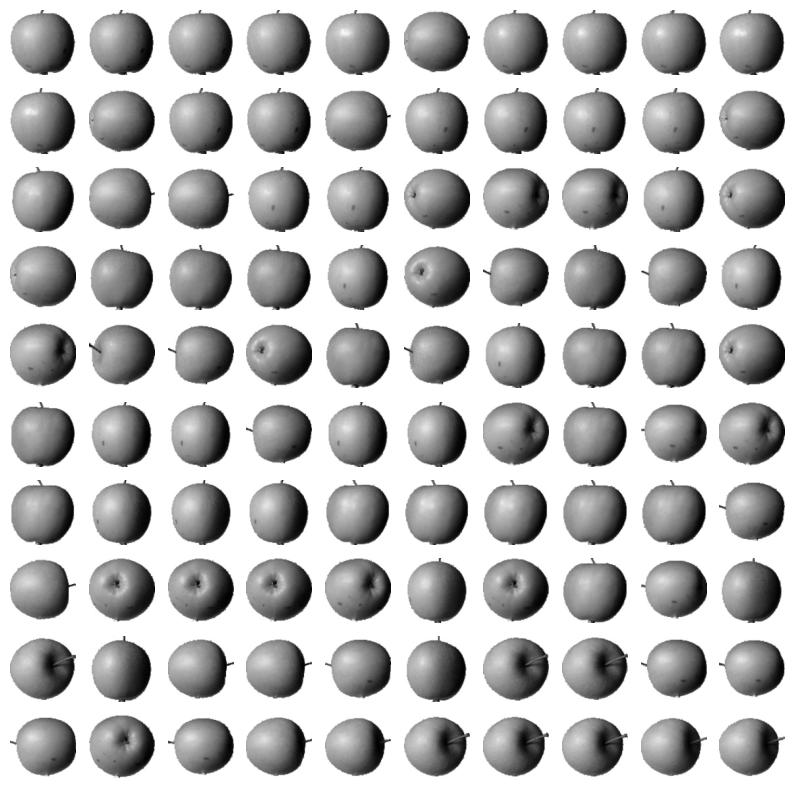

In [27]:
#평균을 뺀 절대값이 가장 작은 것 100개 출력
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
        
plt.show()

## K-Means 알고리즘

### 임의의 샘플 데이터를 이용한 군집

In [28]:
from sklearn.datasets import make_blobs

#중심점의 좌표 와 표준 편차 생성
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], 
                         [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

#데이터 생성
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                 random_state=42)


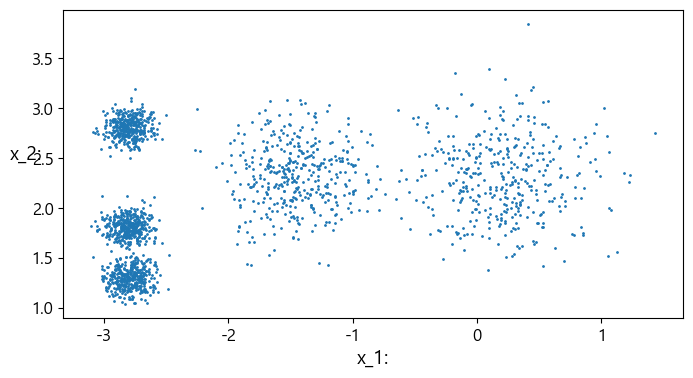

In [29]:
#데이터 확인
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("x_1:", fontsize=14)
    plt.ylabel("x_2:", fontsize=14, rotation=0)
    
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [31]:
#군집 수행
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[2 1 3 ... 1 2 0]


In [32]:
# 각 그룹의 중앙점의 좌표 출력
print(kmeans.cluster_centers_)

[[-2.80372723  1.80873739]
 [ 0.20925539  2.30351618]
 [-2.79846237  2.80004584]
 [-1.4453407   2.32051326]
 [-2.79244799  1.2973862 ]]


In [34]:
#예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))

[1 1 2 2]


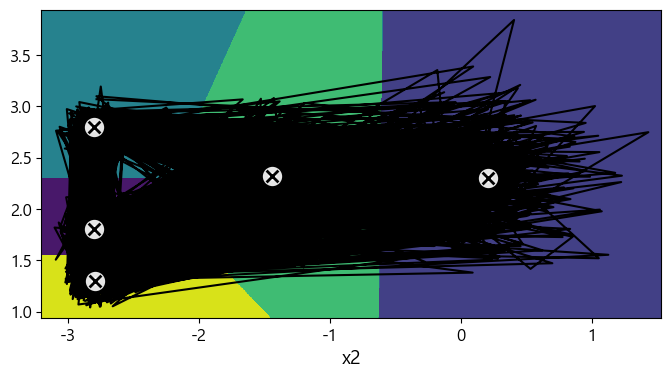

In [36]:
#결정 경계를 시각화
#voronoi diagram: 평면을 특정 점까지의 거리가 가까운 점의 집합으로 분할한 그림

#데이터의 분포를 시각화
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k', markersize=2)
    
    
#중심점을 출력하는 함수
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35,
               linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2,
               linewidths=12, color=cross_color, zorder=11, alpha=1.0)
    
#결정 경계를 그려주는 함수
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, 
                color='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("x1", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.xlabel("x2", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
        

#결정 경계를 그려주는 함수를 호출
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [38]:
#중심점 과 의 거리 확인
print(kmeans.transform(X_new))
print(kmeans.predict(X_new))

[[2.81024337 0.36865958 2.91057812 1.48045212 2.87948466]
 [5.80687792 2.80720102 5.85339553 4.45688037 5.8349053 ]
 [1.20732332 3.28396253 0.28389977 1.69666372 1.71521765]
 [0.7185868  3.21526454 0.36144837 1.56498595 1.22039247]]
[1 1 2 2]


In [39]:
#유클리드 거리 확인
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_,
               axis=2)

array([[2.81024337, 0.36865958, 2.91057812, 1.48045212, 2.87948466],
       [5.80687792, 2.80720102, 5.85339553, 4.45688037, 5.8349053 ],
       [1.20732332, 3.28396253, 0.28389977, 1.69666372, 1.71521765],
       [0.7185868 , 3.21526454, 0.36144837, 1.56498595, 1.22039247]])

In [40]:
#평가 지표 출력
print(kmeans.inertia_)
print(kmeans.score(X))

213.42177131258913
-213.42177131258907


In [45]:
%%time
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(kmeans.inertia_)

213.4217713125891
CPU times: total: 2.12 s
Wall time: 402 ms


In [46]:
%%time
from sklearn.cluster import MiniBatchKMeans
k = 5
miniBatchKMeans = MiniBatchKMeans(n_clusters=k, random_state=42)
y_pred = miniBatchKMeans.fit_predict(X)
print(miniBatchKMeans.inertia_)

231.37642313963232
CPU times: total: 1.39 s
Wall time: 336 ms


In [47]:
#이너셔를 이용한 최적의 클러스터 개수 찾기
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[3535.902973409425, 1169.8353666960004, 662.948074483483, 265.87402716855036, 213.42177131258913, 173.39645036652448, 147.25047404674626, 122.2125039754487, 107.12794033222039]


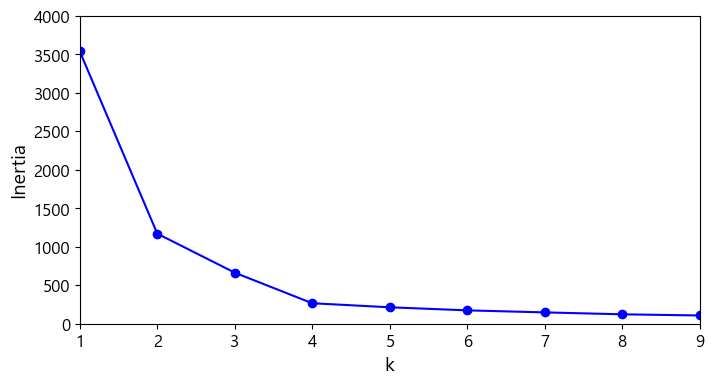

In [48]:
#elbow를 찾기 위해서 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9, 0, 4000])
plt.show()

In [49]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.656578194104489


[0.5889008517726911, 0.5690585495403864, 0.6848978374857873, 0.656578194104489, 0.6039276468206322, 0.5557865979170189, 0.5607610551087878, 0.5634497083361062]


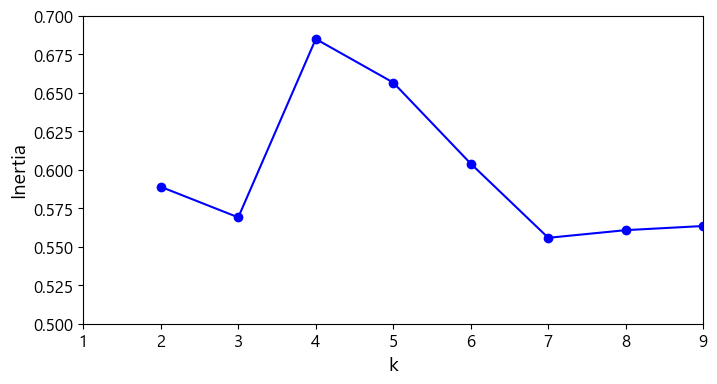

In [56]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
print(silhouette_scores)
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9, 0.5, 0.7])
plt.show()

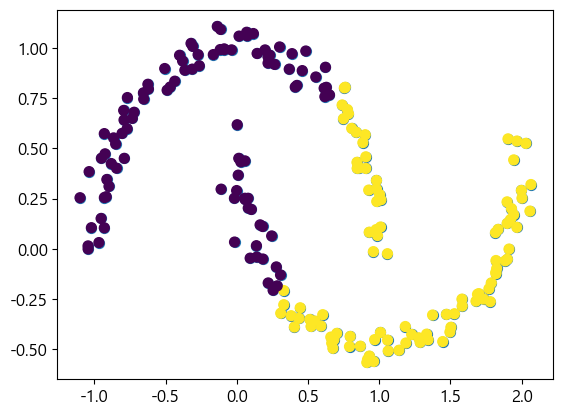

In [60]:
##k-means 의 한계

#완전한 원형이 아닌 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

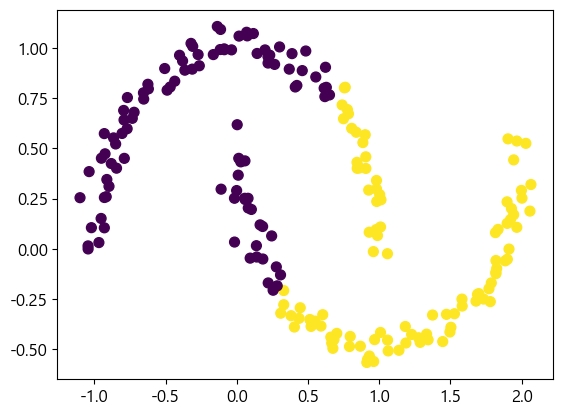

In [61]:
labels = KMeans(2, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

(533, 800, 3)
[[[0.09803922 0.11372549 0.00784314]
  [0.09411765 0.10980392 0.00392157]
  [0.09411765 0.11372549 0.        ]
  ...
  [0.22352941 0.4117647  0.08235294]
  [0.21960784 0.40392157 0.08627451]
  [0.20392157 0.3882353  0.07450981]]

 [[0.09411765 0.10980392 0.00392157]
  [0.09019608 0.10588235 0.        ]
  [0.09019608 0.10588235 0.        ]
  ...
  [0.23529412 0.42352942 0.08627451]
  [0.23137255 0.41568628 0.09803922]
  [0.21568628 0.4        0.08627451]]

 [[0.09019608 0.10588235 0.00784314]
  [0.08627451 0.10196079 0.00392157]
  [0.08627451 0.10196079 0.        ]
  ...
  [0.25882354 0.44705883 0.10980392]
  [0.24705882 0.43529412 0.10588235]
  [0.22745098 0.4117647  0.09411765]]

 ...

 [[0.05490196 0.07058824 0.00392157]
  [0.05490196 0.07058824 0.00392157]
  [0.05098039 0.07843138 0.00784314]
  ...
  [0.05098039 0.23921569 0.01176471]
  [0.03529412 0.21960784 0.00784314]
  [0.01960784 0.2        0.00784314]]

 [[0.05490196 0.07058824 0.00392157]
  [0.05490196 0.0705882

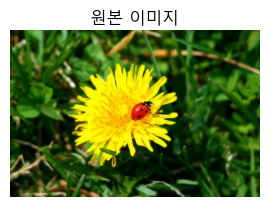

In [63]:
# 군집을 이용한 이미지 분할

#이미지를 읽어와서 출력하기
from matplotlib.image import imread
image = imread('./data/ladybug.png')
print(image.shape)

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("원본 이미지")
plt.axis('off')

10
8
6
4
2


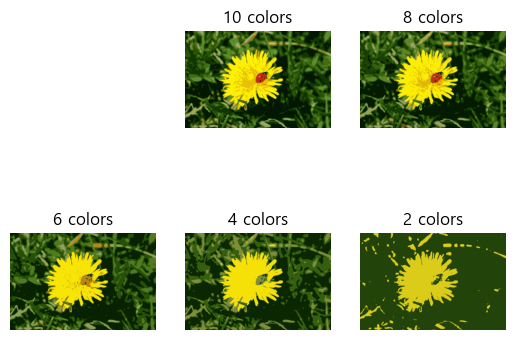

In [69]:
#색상을 가지고 군집을 수행
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
#각 픽셀이 속한 클러스터의 중앙 좌표를 저장
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
#print(segmented_img)

segmented_imgs = []
n_colors = [10, 8, 6, 4, 2]
for n_clusters in n_colors:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{0} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [75]:
#군집을 이용한 차원 축소 후 분류

#8 * 8 크기의 흑백 숫자 이미지 1797 개 가져오기
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

print(X_digits.shape)
print(y_digits.shape)

(1797, 64)
(1797,)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits,
                                                   random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [77]:
log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

0.9688888888888889


In [78]:
from sklearn.pipeline import Pipeline
#군집한 클러스터를 속성으로 추가해서 분류를 하기 때문에 성능이 좋아질 가능성이 높음
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs",
                                  max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)

pipeline_score = pipeline.score(X_test, y_test)
print(pipeline_score)

0.9733333333333334


In [80]:
%%time
#최적의 클러스터 개수 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=36; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=36; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=37; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   6.7s
[CV] END ..............................kmeans__n_clusters=38; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   6.1s
[CV] END ..............................kmeans__n_clusters=39; total time=   6.7s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   8.1s
[CV] END ..............................kmeans__n_clusters=70; total time=   8.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   7.7s
[CV] END ..............................kmeans__n_clusters=71; total time=  10.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   8.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   8.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   9.4s
[CV] END ..............................kmeans__n_clusters=72; total time=   9.3s
[CV] END ..............................kmeans__n_clusters=72; total time=   9.4s
[CV] END ..............................kmeans__n_clusters=73; total time=   7.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   9.1s
[CV] END ...................

NameError: name 'gird_clf' is not defined

In [81]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 79}
0.9844444444444445


## 계층적 군집

In [82]:
#병합 군집
np.random.seed(42)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID4']

X = np.random.random_sample([5, 3]) * 10 
df = pd.DataFrame(X, columns=variables, index=labels)
print(df)

             X         Y         Z
ID_0  3.745401  9.507143  7.319939
ID_1  5.986585  1.560186  1.559945
ID_2  0.580836  8.661761  6.011150
ID_3  7.080726  0.205845  9.699099
ID4   8.324426  2.123391  1.818250


In [83]:
#거리 계산
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels,
                       index=labels)
print(row_dist)

           ID_0       ID_1       ID_2       ID_3        ID4
ID_0   0.000000  10.067500   3.527332  10.163608  10.283767
ID_1  10.067500   0.000000   9.973350   8.323293   2.418558
ID_2   3.527332   9.973350   0.000000  11.285037  10.967857
ID_3  10.163608   8.323293  11.285037   0.000000   8.205581
ID4   10.283767   2.418558  10.967857   8.205581   0.000000


In [84]:
#계층적 클러스터링
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 
                                   'items in cluster'],
            index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
#첫번째 와 두번째는 병합된 클러스터 이름이고 세번째는 거리고 네번째는 아이템 개수
#처음에는 클러스터가 데이터 개수만큼이므로 5개
#1번 클러스터 와 4번 클러스터를 합쳐서 5번 클러스터 생성(데이터 2개)
#0번 클러스터 와 2번 클러스터를 합쳐서 6번 클러스터 생성(데이터 2개)
#3번 클러스터 와 5번 클러스터를 합쳐서 7번 클러스터 생성(데이터 3개)
#6번 클러스터 와 7번 클러스터를 합쳐서 8번 클러스터 생성(데이터 5개)

,row label 1,row label 2,distance,items in cluster
cluster 1,1.0,4.0,3.570507,2.0
cluster 2,0.0,2.0,5.159321,2.0
cluster 3,3.0,5.0,13.182329,3.0
cluster 4,6.0,7.0,18.782841,5.0


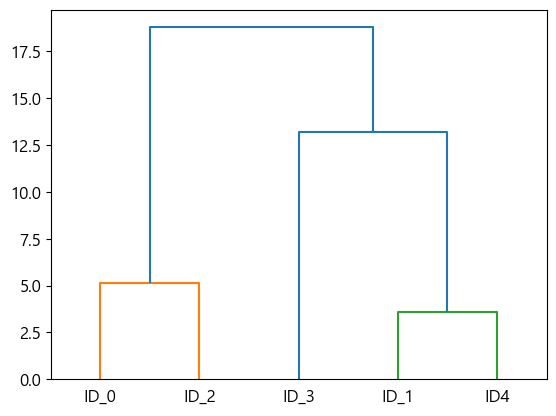

In [86]:
#덴드로그램 출력
#계층적 군집을 시각화 하는 도구
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.show()

## Gaussian Mixture Model

In [87]:
#샘플 데이터를 3개의 군집으로 묶기
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [88]:
#중심점의 좌표
print(gm.means_)

[[ 0.05116693  0.07505701]
 [ 3.39839223  1.05935389]
 [-1.40763382  1.42705028]]


In [89]:
#예측
print(gm.predict(X))

[0 0 2 ... 1 1 1]


In [90]:
#확률
print(gm.predict_proba(X))

[[9.76660045e-01 2.33392754e-02 6.79713861e-07]
 [9.82749546e-01 1.65734903e-02 6.76963988e-04]
 [7.42959049e-05 2.04887015e-06 9.99923655e-01]
 ...
 [4.22276096e-07 9.99999578e-01 2.16925932e-26]
 [4.94998469e-16 1.00000000e+00 1.49550511e-41]
 [2.20699734e-15 1.00000000e+00 8.20533650e-41]]


In [91]:
#생성
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-0.86943947 -0.32788395]
 [ 0.29817175  0.28280831]
 [ 1.84414552  2.07083991]
 [ 3.98145559  1.49986704]
 [ 3.81671773  0.53121245]
 [-1.0401813   0.78641699]]
[0 0 1 1 1 2]
